## Fundamentos II. Redes Neuronales
En este cuadernos se tratarán los fundamentos de las redes neuronales donde veremos temas como la neurona básica, las funciones de activación, el algoritmo de Backpropagation y las Funciones de Coste.

## 1. La Neurona
Comenzaremos estudiando la unidad básica de todas las redes neronales, la **Neurona**. Una neurona es la unidad básica de procesamiento de datos en una capa de la red neuronal. El procesamiento que se realiza en una neurona es en realidad bastante simple, consiste en tomar los datos de entrada, combinarlos mediante una suma ponderada y una vez tenemos el resultado de la suma vemos si el resultado supera un umbral o _bias_ y dependiendo del umbral se envía un resultado u otro a las siguientes neuronas.

Dada una neurona con los pesos de sus entradas `W` y un conjunto de entradas `X`, la suma ponderada realizada en una neurona se define como:

<center>$ \sum_{i=1}^{N} w_i \cdot x_i $</center>



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Este es un ejemplo de como se ralizaria la suma ponderada de una neurona normal
# This example shows how the weighted sum of a neuron is performed
x = np.array([3, 6, 9, 34, 12])
w = np.array([2, 0.5, 1, 5, 0.75])
result = np.sum(w * x)
print('Weighted Sum: ', result)

Weighted Sum:  197.0


Debido a que el umbral puede variar de una neurona a otra y a lo largo de una red se tendrían que hacer muchas compararaciones distintas, se introduce el concepto de **Bias**. El bias es el negativo del umbral seleccionado y lo usamos sumándolo al resultado de la suma ponderada para conseguir que todas las comparaciones sean con cero.

Siendo `t` el umbral definido para una neurona, el bias `b` se puede definir como: $ b \equiv -t $. Añadiendo esto al proceso explicado hasta ahora, el resultado del procesamiento de una neurona sería:

<center>$z = \left\{ \begin{array}{lcc}
1 &   si  & w \cdot x + b > 0\\
\\ 0 &  \text{otro caso} \\ 
\end{array}
\right.$</center>

In [2]:
# Usando el codigo anterior, definir un bias y devolver el resultado de la neurona
b = -4
result = result + b
if result > 0:
    z = 1
else:
    z = 0
    
print('Output (z):', z)

Output (z): 1


Este enfoque sólo permite obtener resultados binarios del procesamiento, esto no es muy útil a la hora del aprendizaje debido a que provoca resultados muy extremos que no se llegarían a ajustar a la realidad del modelo que querermos desarrollar.

## 2. Funciones de Activación
Para solucionar este problema se introduce un paso más en el procesamiento y serían la funciones de activación. Estas funciones tratan de evitar la salida binaria de la neurona usando el resultado de la suma ponderada $z = w \cdot x + b$ con el objetivo de suavizar el resultado. A continuación veremos algunas de las funciones de activación básica y más utilizadas:

## 2.1 Sigmoide
La función **Sigmoide** proporciona una curva más suave de resultados, siendo esta definida como:
<center>$\sigma(z) = \frac{1}{1+e^{-z}}$</center>

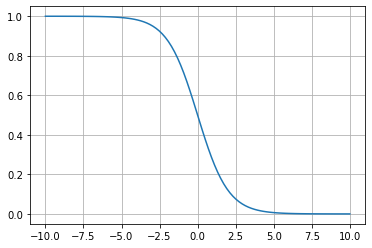

In [3]:
# Plot the sigmoid function with the range [-10,10] of values
x = np.linspace(-10, 10, 100)
f = 1 / (1 + np.exp(x))
plt.plot(x,f)
plt.grid()
plt.show()

Esta función tiene un problema y es que cuando se realizan cambios sutiles en los pesos y en las bias durante el entrenamiento, las actualizaciones tendrán poco o ningún efecto en el rendimiento, y por lo tanto el aprendizaje se estancará. Esta situación se conoce como "Neuron Saturation" y ocurre con las mayorías de las funciones de activación.

### 2.2 Función de Tahn
La función de Tahn permite centrar la activación de le neurona en cero, de forma que las salidas `z` negativas tendrán una activación negativa y las `z` positivas tendrán una activación positiva. Además permite acotar los valores de salida en el rango $[-1, 1]$. Este tipo de funciones se utilizan para generar entradas para otras neurones, hacen menos probable la "Neuron Saturation" y permiten que la red aprenda de una forma más eficiente.

<center>$\sigma(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}}$</center>

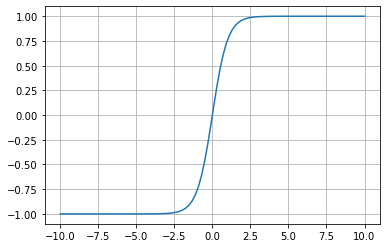

In [4]:
# Plot the Tahn function with the range [-10,10] of values
f = (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
plt.plot(x,f)
plt.grid()
plt.show()

### 2.3 Función ReLU
La función ReLU (rectified Linear Unit) es una función no lineal que utiliza el operador máximo. Esta función es una de las más utilizadas para las neuronas ocultas de la red ya que al utilizar una función no lineal es posible aproximar cualquier función continua. Una neurona oculta es aquella neurona que no pertenece ni a la capa de entrada ni a la capa de salida de la red.

<center>$\sigma(z) = \max(0,z)$</center>

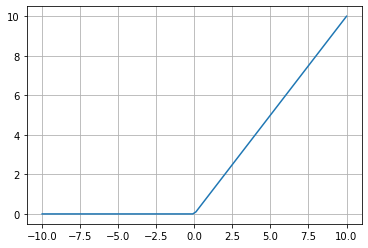

In [5]:
# Plot the ReLU function with the range of values [-10, 10]
f = [ np.max([0,a]) for a in x]
plt.plot(x,f)
plt.grid()
plt.show()

In [6]:
# 1. Implement a class that represents the normal behaviour of a neuron.
class Neuron():
    def __init__(self, weights, bias, activation_f):
        """This class represents the behaviour of a simple neuron. The parameters to use this class are:
        - Weights: a numpy list of the inputs' weigts
        - Bias: the value of the bias
        - Activation Function
        """
        self.W = weights
        self.b = bias
        self.act_f = activation_f
    
    def predict(self, X):
        """This function estimate the output value of the neuron"""
        assert len(X) == len(self.W)
        z = np.sum(self.W * X) + self.b
        return self.act_f(z)
    
    def __str__(self):
        return f'Neuron({len(self.W)}, {self.b})'

In [7]:
# 2. Implement the following activation functions using lambda expressions:
# a) Sigmoid Function
sigmoid = lambda z: 1 / (1 + np.exp(z))

# b) Tahn Function
tahn = lambda z: (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))

# c) ReLU Function
relu = lambda z: np.max([0,z])


# 3. Create a neuron with the following activation functions with random weights and bias
# Use the function np.random.rand and multiply by 2 and substract by 1 crop the range of values between [-1,1]
w = np.random.rand(4) * 2 - 1 
b = np.random.rand(1)[0] * 2 - 1
print(f'W: {w}, b: {b}')
#w = np.asarray([0.5, 1.5, 10, 4])
#b = 50

# a) Sigmoid Neuron
sigmoid_neuron = Neuron(weights=w, bias=b, activation_f=sigmoid)

# b) Tahn Neuron
tahn_neuron = Neuron(weights=w, bias=b, activation_f=tahn)

# c) ReLU Neuron
relu_neuron = Neuron(weights=w, bias=b, activation_f=relu)

W: [-0.491469   -0.83180913 -0.64632014  0.94041655], b: -0.6912673920176178


In [8]:
# 4. Generate a random input and use it to calculate the different outputs in the neurons developed previously
data = np.random.rand(4)
print(f'Input Data: {data}')

sigmoid_output = sigmoid_neuron.predict(data)
tahn_output = tahn_neuron.predict(data)
relu_output = relu_neuron.predict(data)
print(f'Resultados:\n\t- Sigmoid: {sigmoid_output}\n\t- Tahn: {tahn_output}\n\t- ReLU: {relu_output}')

Input Data: [0.46389819 0.03696816 0.61307139 0.92315513]
Resultados:
	- Sigmoid: 0.6172989882841416
	- Tahn: -0.44472023653606874
	- ReLU: 0.0


## 3. La importancia de las derivadas
Ahora que ya hemos visto como funciona el procesamiento de los datos dentro de una neurona, podemos avanzar para ver cómo aprende la neurona. Como se mencionó en secciones anteriores, la neurona aprende ajustando sus parámetros: los pesos y los bias. Pero una red neuronal no está formada por una sola neurona, incluso las redes neuronales más sencillas pueden tener cientos de parámetros y cada uno de ellos afecta a los demás. Esto nos lleva a preguntarnos: _¿cómo ajustamos los parámetros si aparentemento es una tarea imposible?_

La respuesta es tratar el ajuste de los parámetros como si fuese un problema de optimización, el objetivo de este problema puede resumirse como: ¿Cuál es el conjunto de parámetros que consigue minimizar la función de coste de la red? Si tratamos la red como si fuese una función matemática y la mapeamos frente a los resultados que proporciona en la función de coste, podemos ver las zonas donde se encuentran los mínimos relativos y absolutos de la función.

Todo problema de optimización de funciones, tiene como base la derivada o el gradiente de la función que permite conocer la tendencia de la función en un punto, es decir, nos permite saber si la función esta creciendo o decreciendo. Con esto podemos encontrar los mínimos de la función debido a que podemos considerar como mínimo a un punto en el que el punto anterio esté decreciendo, el punto posterior esté creciendo y la derivada del punto sea cero.

Aunque para las redes neuronales usamos el gradiente, que es la generalización de la derivada para cualquier dimensión. El proceso sigue siendo el mismo, calcular el gradiente en un punto y usarlo para modificar los parámetros.

### 3.1 Descenso del Gradiente
El descenso del gradiente es un algoritmo de optmización que dado una función diferenciable, es, teóricamente, posible encontrar su mínimo de una forma analítica e iterativa. Esto aplicado a las redes neuronales, significa que podemos encontrar una combinación de parámetros que permita obtener la mínima pérdida en la función de coste.

Esto nos lleva a tratar de resolver la ecuación polinómica de $N$ variables, siendo $N$ el número de parámetros de la red. Pero resolver una ecuación de tal tamaño es computacionalmente inasumible en tiempo de ejecución. Por ello lo que en realidad se hace es un proceso de aproximación. El proceso de aproximación se basa en coger el punto actual donde se ecuentra la red y calcular su gradiente. El gradiente es utilizado para saber en qué dirección del especio de parámetros debemos modificar el punto en el que nos encontramos. Este proceso se repite todas las veces que sean necesarias hasta alcanzar un mínimo de la función.

Debemos tener en cuenta que las modificaciones no pueden ser demasiado pequeñas porque tardaríamos demasiadas iteraciones en llegar al mínimo, ni demasiado grandes ya que no tendríamos la exactitud necesaria y lo valores se dispararían por el espacio de parámetros. Este paso o grado con el que se modifican los parámetros se conoce como **Learning Rate**.

Esta es la técnica base utilizada para solucionar el problema de minimización pero presenta un problema importante y es que le proceso termina cuando ha encontrado un mínimo pero este puede no ser un mínimo absoluto, es decir, puede que haya encontrado una buena combinación de parámetros pero puede no ser la mejor de todas.

Para solucionar este problema es posible realizar una pequeña modificación al algoritmo para que tenga en cuenta el momento y la velociadad del gradiente de la función, este enfoque viene inspirado de la _Física_. Con este enfoque los parámetros de la red son modificados según el valor del gradiente y por las modificaciones anteriores. A parte de esta modificación, existen muchas otras variantes de este algoritmo pero todos los algoritmos de aprendizaje utilizan el **Descenso del Gradiente** como base.

### 3.2 Algoritmo de Backpropagation
El **Algoritmo de Backpropagation** es el algoritmo por execelencia que implementa el **Descenso del Gradiente** en el proceso de optimización de las redes neuronales. Esto se debe a que no podemos computar de manera explícita el gradiente de una red neuronal a causa de que una red neuronale es el encadenamiento de operaciones sobre vectores o mejor conocidos como _tensores_ (_tensors_) pero cada una de estas operaciones tiene un gradiente conocido y sencillo.

Con este problema, el algoritmo de Backpropagation hace uso de la **Regla de la Cadena**:

<center>$\begin{eqnarray*}
(g \circ f)(x) = g(f(x)) \\
(g \circ f)'(x) = g'(f(x)) \cdot f'(x)
\end{eqnarray*}$</center>

Debido a esta regla saca su nombre el algoritmo, ya que se empieza desde el final de la red, es decir, desde la neurona de salida hasta las capas iniciales de red, aplicando la regla de la cadena para conocer la influencia que tiene cada parámetro al coste total de la red. Actualmente existen librerías como _TensorFlow_ capaces de realizar **Diferenciación Simbólica** de manera automática, ahorrando tener que calcular el gradiente de cada red de forma manual.

Ahora se explicará en mayor detalle el proceso que sigue el algoritmo para modificar los parámetros de la res. Dada una función de coste $C$ y un conjunto de pesos $W$ y de bias $b$, necesitamos calcular los gradientes:

<center>$\frac{\partial C}{\partial W} \hspace{.5cm} \frac{\partial C}{\partial b}$</center>

Pero no es posible calcular estas derivadas parciales directamente debido a la estructura de capas de la red, por lo que tendremos que calcular estas dos derivadas parciales para cada conjunto de pesos y bias de cada capa. Esto los representaremos por los pesos de la capa $L$: $W^L$ y los bias de la capa $L$: $b^L$. Por lo que la función que debemos derivar es:
<center>$C(a^L(z^L)) = C(a^L(W^L \cdot a^{L-1} + b^L))$</center>

Siendo $a^L$ la función de activación de la capa $L$.

Utilizando la **Regla de la Cadena** podemos dividir las derivadas parciales que queremos calcular en tres sencillos cálculos:

<center>$\begin{eqnarray}
\frac{\partial C}{\partial W^L} = \frac{\partial C}{\partial a^L} \cdot \frac{\partial a^L}{\partial z^L} \cdot \frac{\partial z^L}{\partial W^L} \\
\frac{\partial C}{\partial b^L} = \frac{\partial C}{\partial a^L} \cdot \frac{\partial a^L}{\partial z^L} \cdot \frac{\partial z^L}{\partial b^L}
\end{eqnarray}$</center>

Se puede observar que en ambas, las dos primeras derivadas parciales son iguales y cada una de ellas representa la derivada de la función de coste y la derivada de la función de activación respectivamente. Dado que conocemos las derivadas de dichas funciones, el cálculo se simplifica y la última derivada parcial de los pesos es la derivada de la suma ponderada y la última derivada parcial de los bias es siempre 1 debido a la forma en la que aparece en la suma ponderada.

Estas dos derivadas primeras que debemos calcular se conocen como **Error imputado a la neurona** y no indica el papel que ha jugado una neurona en concreto en el resultado final, por lo general estas derivadas se representan de la forma:

<center>$\delta^L = \frac{\partial C}{\partial a^L} \cdot \frac{\partial a^L}{z^L}$</center>

También debemos tener en cuenta que la derivada parcial de la suma ponderada con respecto a los pesos se puede simplificar de la forma:

<center>$\frac{\partial z^L}{\partial W^L} = a^{L-1}$</center>

Teniendo en cuenta todo esto los cálculos finales y simplificados son:
<center>$\begin{eqnarray}
\frac{\partial C}{\partial W^L} = \delta^L \cdot a^{L-1} \\
\frac{\partial C}{\partial b^L} = \delta^L
\end{eqnarray}$</center>

Todo esto ha sido solo para calcular las derivadas parciales de la capa final pero también debemos calcular las derivadas parciales de las capas anteriores y después de otro proceso de cálculo y simplificación, se llega a que para las capas anteriores debemos calcular la siguiente expresión:

<center>$\delta^{L-1} = W^L \cdot \delta^L \cdot \frac{\partial a^{L-1}}{\partial z^{L-1}}$</center>

Con estas expresiones calculamos las derivadas parciales de todas las capas de la red y luego las utilizamos para modificar los parámetros de la red de manera ponderada por el Learning Rate. La forma por la que se modifican los parámetros es mediante una resta $B_{t+1} = B_t - LR \cdot \delta$ y $W_{t+1} = W_t - LR \cdot \delta \cdot a $

In [9]:
# Ejercicio en el que hay que realizar una red neuronal sencilla y
# programar el aprendizaje de la red manualmente haciendo uso del algoritmo
# de backprogation y de la regla de la cadena.

# 5. Implement a class Layer to store the data of a layer of a neural net with the weights of each neuron, the bias
# each neuron and the activation function of the layer.
class Layer():
    def __init__(self, n_inputs, n_neurons, act_f):
        self.act_f = act_f # Activation Function
        self.b = np.random.rand(1, n_neurons) * 2 - 1 # Bias standarized and normalized
        self.W = np.random.rand(n_neurons, n_inputs) # Weights of each neurons for each inputs [neurons x inputs]

In [10]:
# ACTIVATION FUNCTIONS
# For this exercise, we will onli use the sigmoid and ReLU functions with their derivatives
sigmoid = (lambda x: 1 / (1 + np.exp(-x)), # function
          lambda x: x * (1-x),             # derivative
          'Sigmoid')                       # name

relu = (lambda x: np.maximum(0,x),
       lambda x: np.exp(x) / (1 + np.exp(x)),
       'ReLU')

# LOSS FUNCTION
mse = (lambda y_e, y_p: np.mean((y_e - y_p)**2),
       lambda y_e, y_p: y_e - y_p,
       'Mean Squared Error'
)

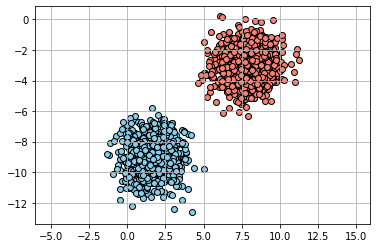

In [11]:
# 6. Load the data from the file dataset.csv using the pandas module and
# display the datas. This file contains the coordinates of points as well as
# the class of each point
df = pd.read_csv('dataset.csv')
X = np.array(df[['x1', 'x2']])
Y = np.array(df['y'])

plt.scatter(X[Y==0][:,0], X[Y==0][:,1], c='salmon', edgecolors='black')
plt.scatter(X[Y==1][:,0], X[Y==1][:,1], c='skyblue', edgecolors='black')
plt.axis('equal')
plt.grid()
plt.show()

In [119]:
# 7. Implement a class Net able to create a neural net with the class Layer
# and implement a function to perform a prediction and other to perform an
# iteration of the training proecess

class Net():
    def __init__(self, layers, layers_act_f, loss_f):
        # Layers: a list of integers with the number of neurons of
        # each layer, the first elemento will be the number of inputs
        # of the net
        # Layers Act F: a list of activation functions for each layer,
        # it will have an elements less than the input layers because the
        # input layer does not need an activation function
        # Loss Function: the losss function that the net will use
        self.loss_f = loss_f
        ls = []
        for i, n in enumerate(layers[:-1]):
            ls.append(Layer(n, layers[i+1], layers_act_f[i]))
        self.layers = ls
        
    def predict(self, X):
        # This function takes the input of the net, this input can be
        # some samples at the same time, and process it to obtain
        # the output of the net.
        # This function should return a register of all the outputs
        # from the different layer of the net, this will be useful and
        # essential at the trainning process
        outputs = [(None, X)]
#         print('Layers Z shape:')
        for i, layer in enumerate(self.layers):
#             print('\t-', outputs[-1][1].shape, layer.W.T.shape)
            z = outputs[-1][1] @ layer.W.T + layer.b
            a = layer.act_f[0](z)
            outputs.append((z, a))
        return outputs
    
    def train(self, X, Y, lr=0.01):
        # This function must implement a training iteration. First,
        # we must estimate the outputs of the dataset using the `predict`
        # function. Then, we must compute the loss value and estimate
        # the partial derivatives of the net. Finally, we must use the 
        # partial derivatives to ajust the net parameters.
        
        # Foward Pass Phase
        out = self.predict(X)        
        
        # Loss Value
        loss = self.loss_f[0](Y, out[-1][1])
        print('Loss:', loss)
        
        # Compute the partial derivatives
        deltas = []
        for i, r in reversed(list(enumerate(out))):
            z = r[0]
            a = r[1]
            
            if i == len(out)-1: # Last Layer
                Y = Y[:, np.newaxis] # This must be done for the shape of the train result tensor
                d = self.loss_f[1](Y, a) * self.layers[i-1].act_f[1](a)
                deltas.insert(0, d)
            else: # Other Layers
                d = deltas[0] @ _W * self.layers[i-1].act_f[1](a)
                deltas.insert(0, d)
                
            _W = self.layers[i-1].W
            
            # Use the Gradient Descend at the same time the delta are
            # being compute
            self.layers[i-1].b = self.layers[i-1].b - lr * np.mean(deltas[0], axis=0, keepdims=True)
            self.layers[i-1].W = self.layers[i-1].W - lr * (out[i-1][1].T @ deltas[0]).T
        return out[-1][1]

In [120]:
topology = [2, 4, 8, 4, 1]
l_act_f = [relu, relu, relu, sigmoid]
net = Net(topology, l_act_f, mse)
net.train(X,Y)

Loss: 0.400754235176072


array([[1.        ],
       [1.        ],
       [0.72682694],
       ...,
       [0.72682694],
       [0.72682694],
       [1.        ]])

## 4. Funciones de Coste
Existen muchas **Funciones de Coste** diferentes, cada una de ellas con características especiales que las adecuan más que otras para resolver cierto tipo de problemas. Las funciones que han demostrado los mejores resultados en cada tipo de problema de redes neuronales son:
- **Binary Cross-entropy**: problemas de clasificación binaria
- **Categorical Cross-entropy**: problemas de clasificación con varias clases
- **Error Cuadratico Medio**: problemas de regresión
- **Connectionist Temporal Classification (CTC)**: problemas de aprrendizaje de secuencias.